<a href="https://colab.research.google.com/github/biangomes/Gastos_Medicos/blob/main/Medical_Cost_Personal_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto "Custos Médicos"

Considera-se despesas médicas os pagamentos efetuados a médicos de qualquer especialidade, dentistas, psicólogos, fisioterapeutas, terapeutas ocupacionais e afins.



In [2]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings('ignore')

sns.set_style()
%matplotlib inline


In [16]:
# Importando o arquivo como df
df = pd.read_csv('insurance.csv')

# Lendo as primeiras entradas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Dicionário das colunas:**

- `age`: idade de cada consumidor do seguro;

- `sex`: sexo do consumidor;

- `bmi`: *body mass index*. No Brasil, é o índice de massa corpórea, **IMC**;

- `children`: se o consumidor tem filhos ou não;

- `smoker`: se o consumidor fuma ou não;

- `region`: região que o consumidor mora;

- `charges`: custos que o consumidor teve/tem com o seguro de saúde.

In [5]:
# Shape do dataset
print(f"Variáveis: {df.shape[1]}\nDados inseridos: {df.shape[0]}")

Variáveis: 7
Dados inseridos: 1338


In [6]:
# Verificando quantos dados nulos existem
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

A célula anterior nos mostrou que não existem valores nulos no nosso conjunto de dados. Para ficar mais fácil, vamos renomear as colunas

In [17]:
df.rename(columns={'age': 'idade', 'sex': 'sexo', 'bmi': 'imc', 'children': 'filhos', 'smoker': 'fumante', 'region': 'regiao', 'charges': 'custos'}, inplace=True)

In [13]:
# Visualizando o tipo dos dados
print(df.dtypes, '\n')

# Visualizando DataFrame
df

idade        int64
sexo        object
imc        float64
filhos       int64
fumante     object
regiao      object
custos     float64
dtype: object 



,idade,sexo,imc,filhos,fumante,regiao,custos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


É muito comum em problemas amostrais dentro da estatística, a presença de valores **discrepantes**, ou melhor, **_outliers_**. Estes valores fogem totalmente do "padrão" do dataset e muitas vezes pode ser um problema, uma vez que interfere nos resultados dos teses.

Vamos verificar a presença de *outliers*.

In [20]:
df.describe()

,idade,imc,filhos,custos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Fazendo uma leitura abaixo do resultado da célula acima, temos o seguinte:

> **Obs.:** lembre-se que existem variáveis binárias (sexo e fumante), portanto alguns valores não devem existir.

- **count**: contagem dos valores, ou seja, **quantos valores existem. Como todos possuem a mesma quantidade, sabemos que não existem dados faltantes em nenhuma das colunas.

- **mean**: se refere à média dos valores. Podemos utilizá-la para fins de comparação quando existir a hipótese de *outlier*.

- **std**: representa o **desvio padrão**, o quão dispersos os dados estão da média.

- **min**: menor valor.

- **25%**: 1/4 do quartil.

- **50%**: 1/2 do quartil, **mediana**.

- **75%**: 3/4 do quartil.

- **max**: 4/4 do quartil, maior valor.

*Existem outliers?*

A priori, os dados não parecem estar discrepantes. Não ao ponto de induzir a nossa análise ao erro.

Como as colunas `sexo` e `fumante` só possuem apenas **dois valores** (female ou male e yes ou no, respectivamente), portanto podemos transformar os dados da seguinte forma:

- female = 1

- male = 0

- fumante = 1

- não fumante = 0


In [21]:
# Convertendo primeiro a coluna sexo
df['sexo'].replace(['male', 'female'], [0,1], inplace=True)

# Convertendo a coluna fumante
df['fumante'].replace(['no', 'yes'], [0, 1], inplace=True)

# Visualizando o df
df.head()

,idade,sexo,imc,filhos,fumante,regiao,custos
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


### Hipótese 1: fumantes arcam com mais despesas médicas do que não fumantes.

Queremos verificar se existe correlação entre pessoas que fumam e o custo em despesas médicas. Se essa correlação existe, ela é perfeita?


Antes de partirmos diretamente para o código, precisamos fazer uma reflexão estatística antes. A variável **`fumante`**, embora tenha como valor `1` ou `0` (*números, concorda?*), ela é categórica. Ora, lembra que demos um `replace` para os valores de `male` e `female`, em que ficou `0` e `1`, respectivamente? Estes números, embora números, têm significados categóricos.

Já a variável **`custos`** é numérica (suponho que não exista dúvidas quanto a isso).

**Qual a implicação disso?**

A implicação é: **precisamos calcular a correlação que permita ser atribuída em uma variável categórica e uma numérica.**

---
#### Se você não sabe o que é correlação...

**Correlação** é o quanto e como duas variáveis estão relacionadas. Estatisticamente, quer dizer o quanto uma variável está **associada** a outra. Também quer dizer que é linear, uma variável cresce (ou decresce) uma quantidade fixa em relação a outra. O **grau de correlação** é um escalar $ 0 < corr < 1 $ que mede **quão** as variáveis estão correlacionadas (se estiverem, rs). 

Com a imagem abaixo, eu simplifico os tipos de correlação e os seus valores.


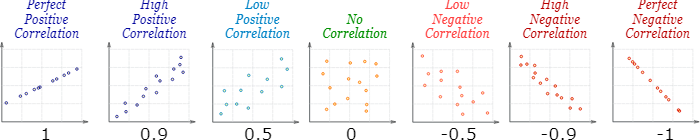




---

Eu estou lhe explicando essa situação, porque ao fazer este trabalho eu fiquei em dúvida também. Se você é iniciante como eu, não se preocupe, pois estamos no mesmo barco!

Pesquisando na literatura (vide *stackoverflow* e correlatos) sobre a resolução de problemas como esse, encontrei o coeficiente de correção Point-Biserial cujo as propriedades permitem calcular o coeficiente de correlação entre uma variável binária (0 ou 1) e uma variável numérica. A biblioteca `SciPy` permite tal implementação, de acordo com o código abaixo:

```
from scipy import stats

stats.pointbiserialr(x, y)
```

Ela retorna uma tupla `(correlation = , pvalue = )`.

Uma curiosidade é que usando o que usei antes:

```
correlation = df[['fumante', 'custos']].corr(method='pearson')
```
os resultados foram bem próximos. O primeiro deu `0.7872` e o segundo deu `0.79`.

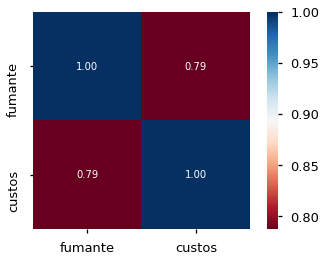

In [22]:
# Verificando correlacao
correlation = df[['fumante', 'custos']].corr(method='pearson')

sns.heatmap(correlation, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Dado a explicação anterior e o gráfico de calor, podemos concluir que **existe uma correlação positiva entre fumantes e custos médicos, de tal forma que quem fuma finda tendo maiores custos com despesas médicas**.

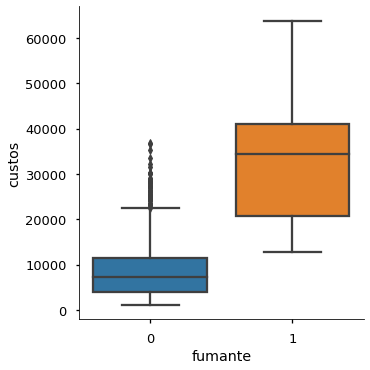

In [ ]:
# Plotando scatter plot
sns.catplot(x=df.fumante, y=df.custos, kind='box', data=df);

In [47]:
# Tentar fazer uma limpeza dos dados
df["outlier"] = 0
df.loc[(df.fumante == 0) & (df.custos > 22000), "outlier"] = 1

O gráfico acima nos mostra que os fumantes, de fato, têm maiores custos com despesas médicas.

### Hipótese 2: existe uma relação positiva entre a quantidade de filhos e os custos com despesas médicas?

O que eu quero dizer com isso é: pessoas que tem mais filhos que as outras gastam, em uma quantidade proporcional, comparado às que não têm filhos?

**Como vamos fazer isso?**

Podemos filtrar as colunas `filhos` e `custos`, em que as duas são variáveis numéricas.

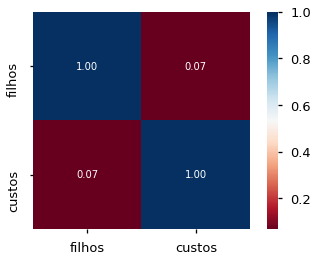

In [25]:
# Coeficiente de correlação
correlation2 = df[['filhos', 'custos']].corr()

# Mapa de calor da variavel correlation2
sns.heatmap(correlation2, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

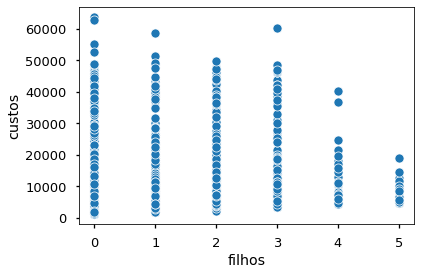

In [30]:
# Grafico de dispersao
sns.scatterplot(x=df.filhos, y=df.custos, data=df.custos);